In [385]:
###  Reading, Understanding and Visualizing

In [386]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [387]:
df= pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [388]:
df.shape

(730, 16)

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [390]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [391]:
df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [392]:
df.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [393]:
df=df.drop(['instant', 'dteday', 'casual','registered'], axis=1)

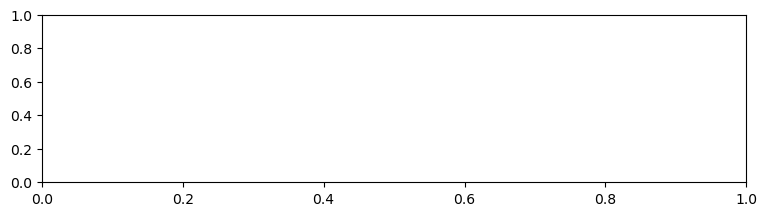

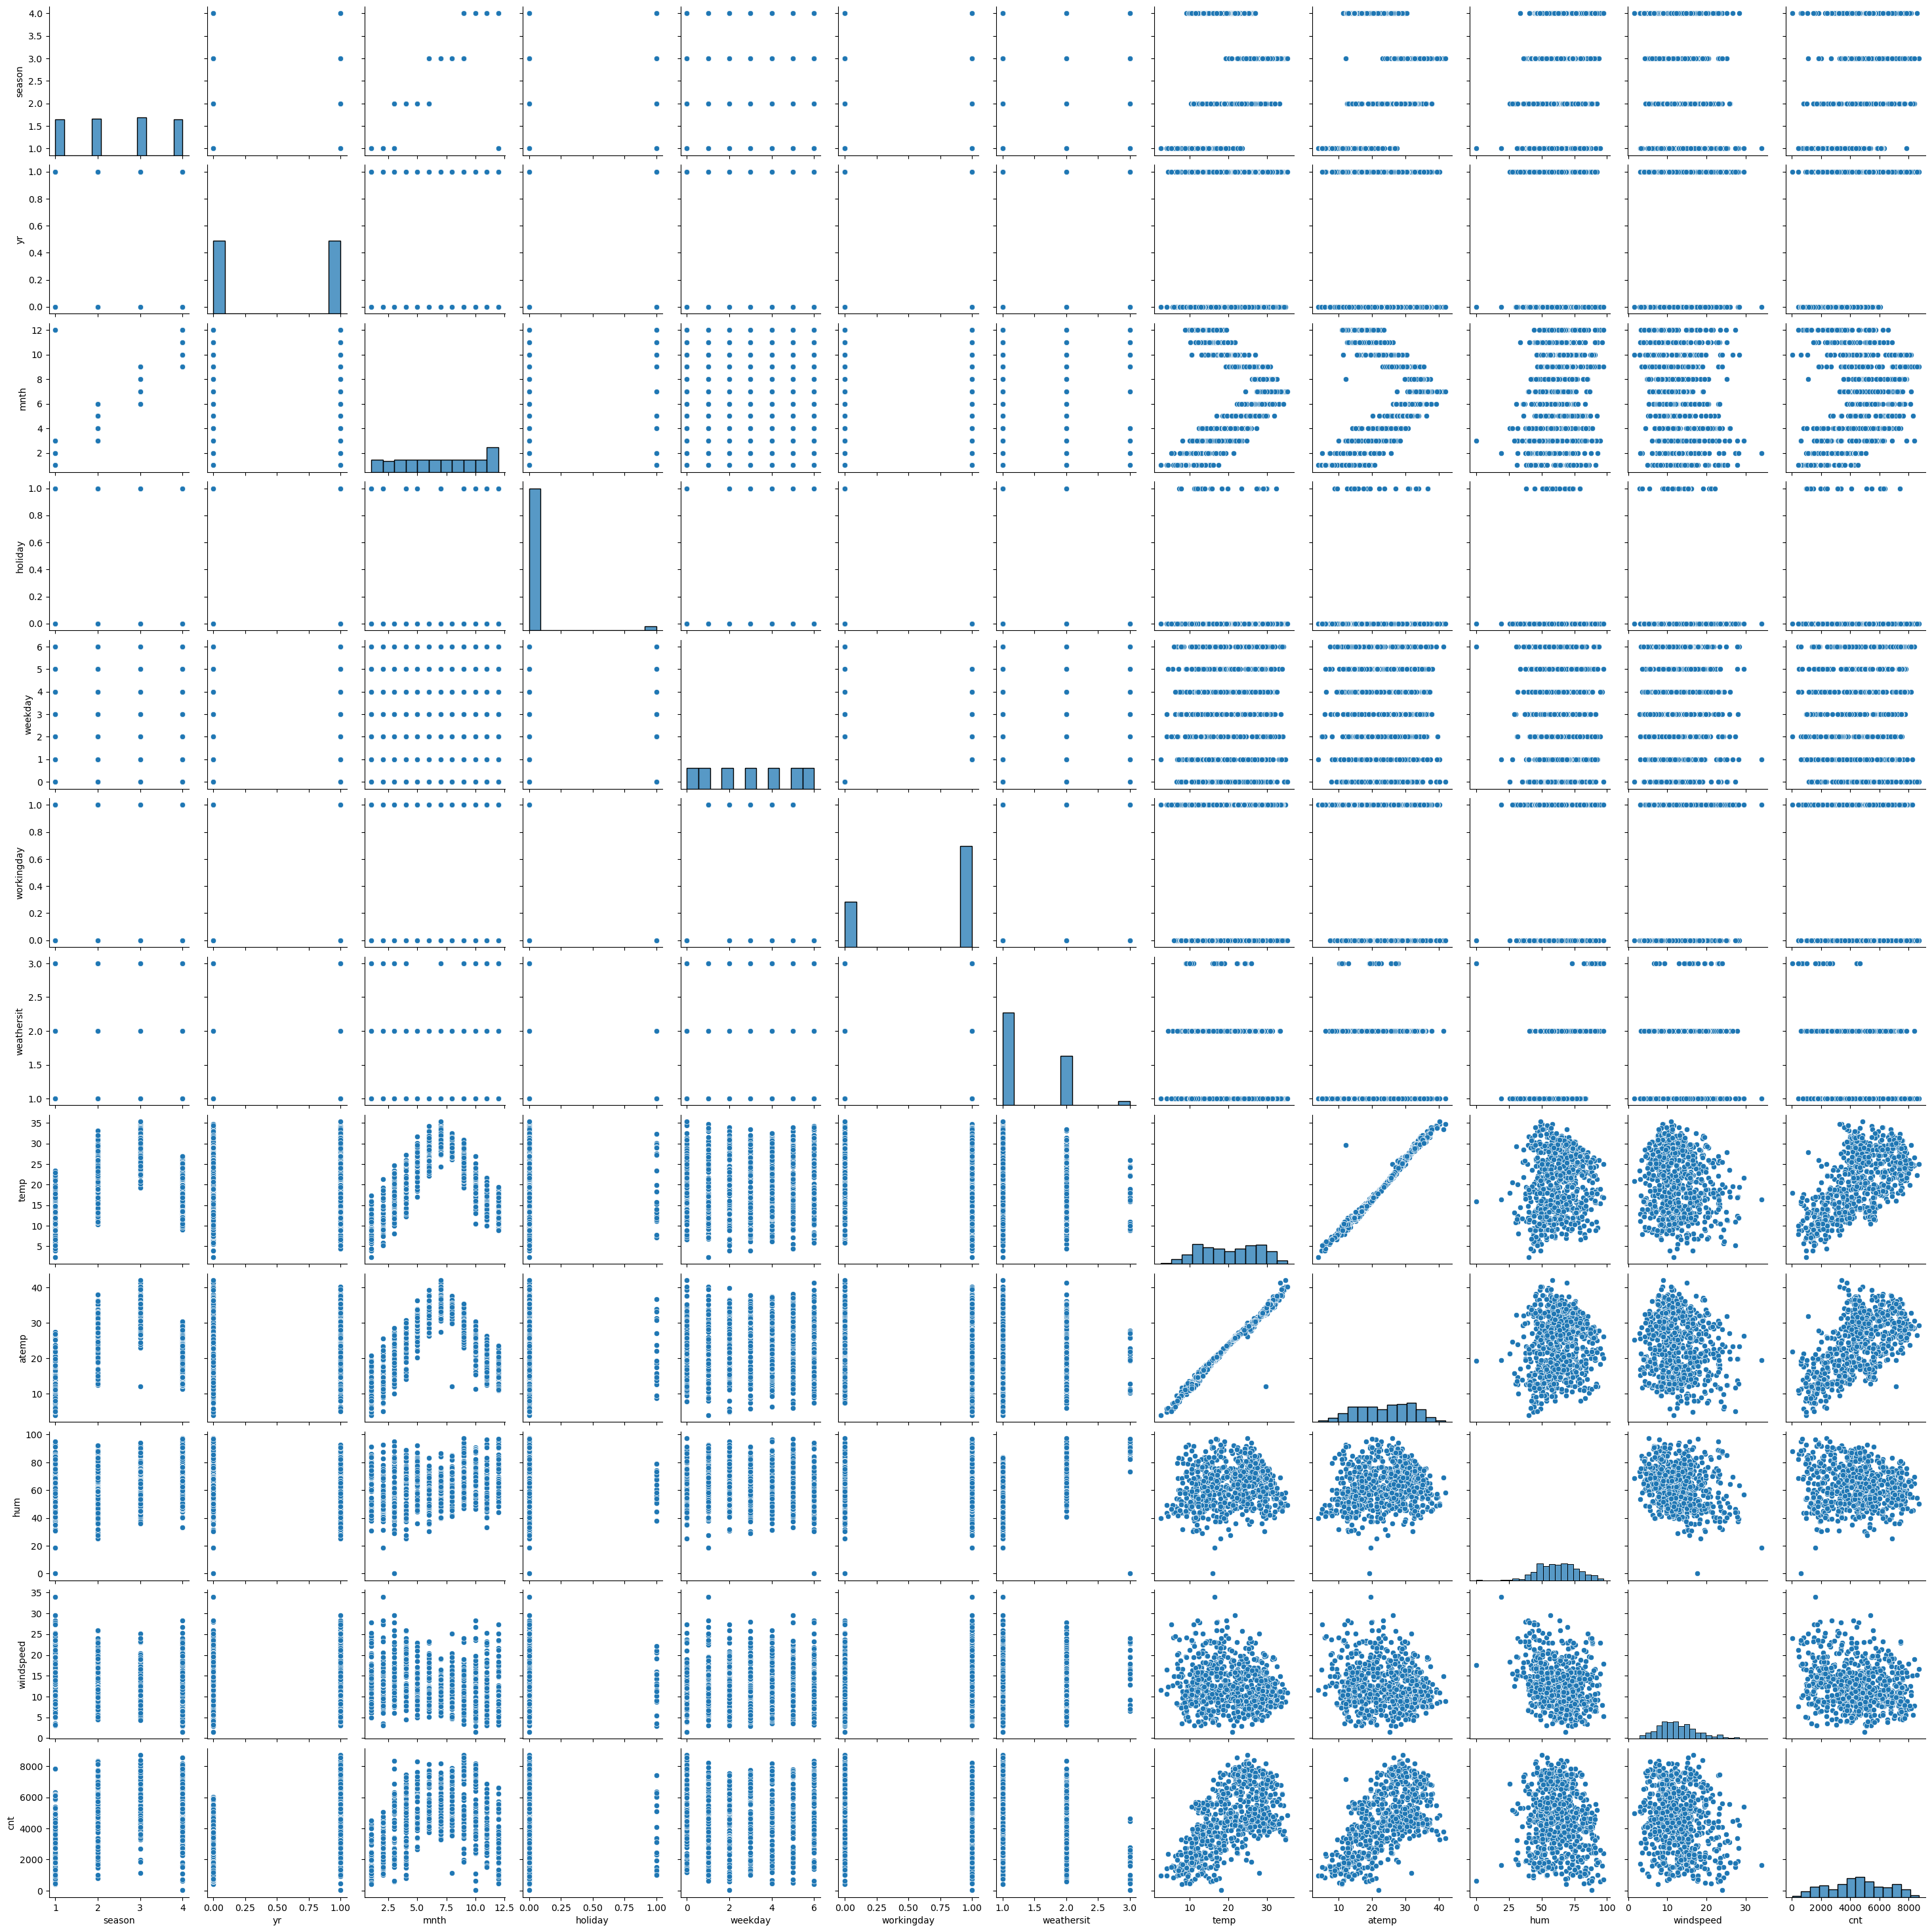

In [394]:
#Visualizing

sns.pairplot(df)
plt.show()

### Preparing the data for modelling
- Encoding
   - Convert into Categorical Columns (binary to 0/1)
   - Create Dummy Variables 
-  Split into train and test model  
- Rescaling of Variables

### Convert to Categorical Columns
 

In [395]:
df['season']= df.season.apply(lambda x : "spring" if x==1 else ("summer" if x==2 else ("fall" if x==3 else "winter")))

In [396]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [397]:
df['weathersit']= df.weathersit.apply(lambda x : "Clear" if x==1 else ("Mist" if x==2 else ("Light Rain" if x==3 else "Heavy Rain")))

In [398]:
df['weathersit'].value_counts()

Clear         463
Mist          246
Light Rain     21
Name: weathersit, dtype: int64

use BoxPlot to check outlier

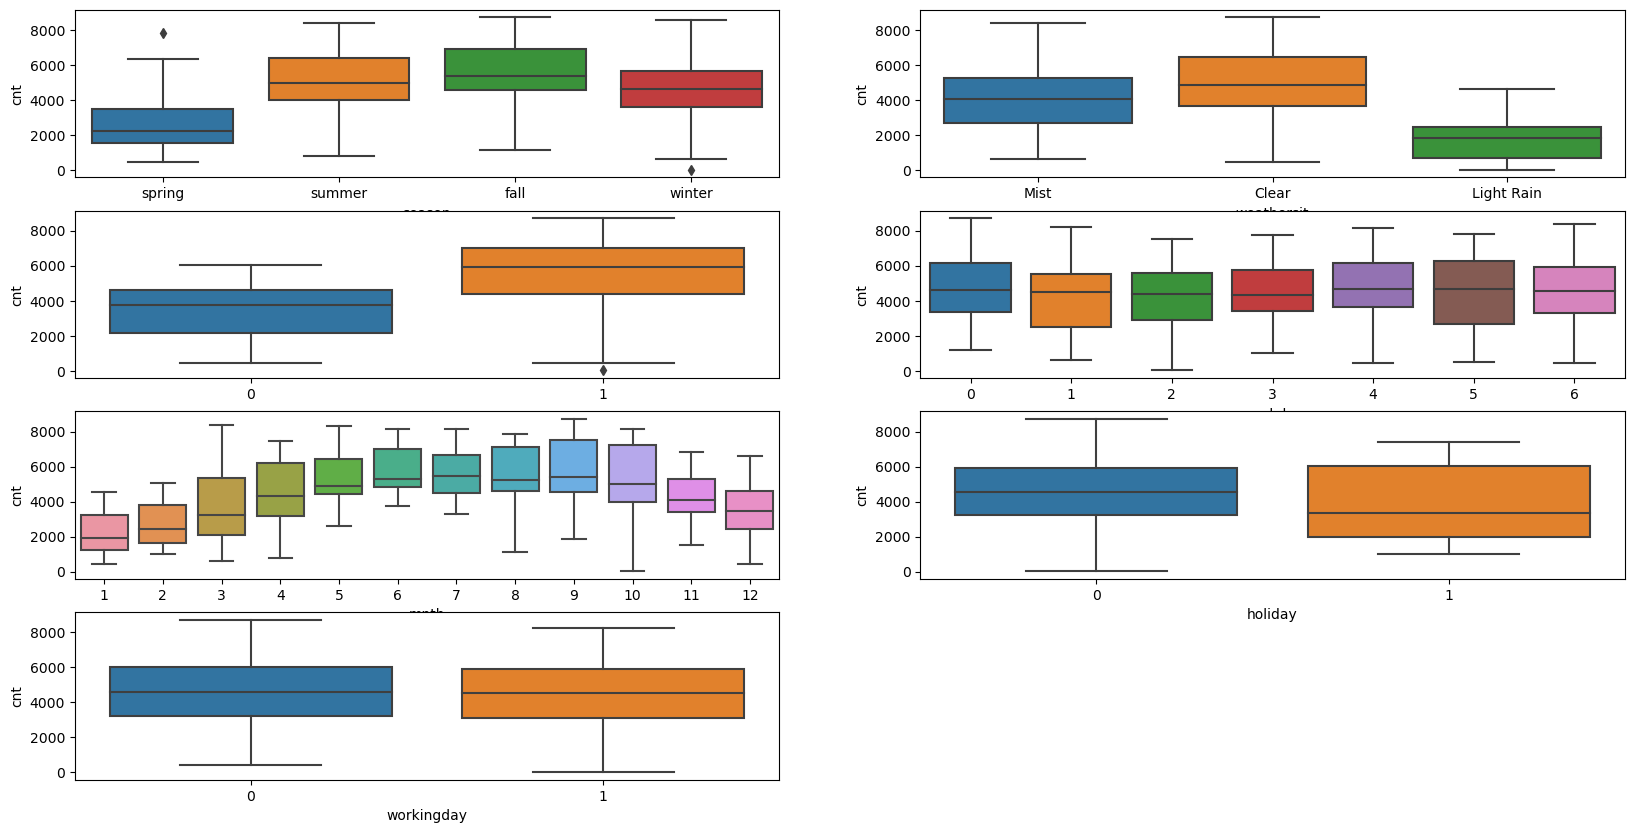

In [399]:
plt.figure(figsize=(20,10))
plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(4,2,2)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(4,2,3)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(4,2,4)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(4,2,5)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(4,2,6)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(4,2,7)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.show()

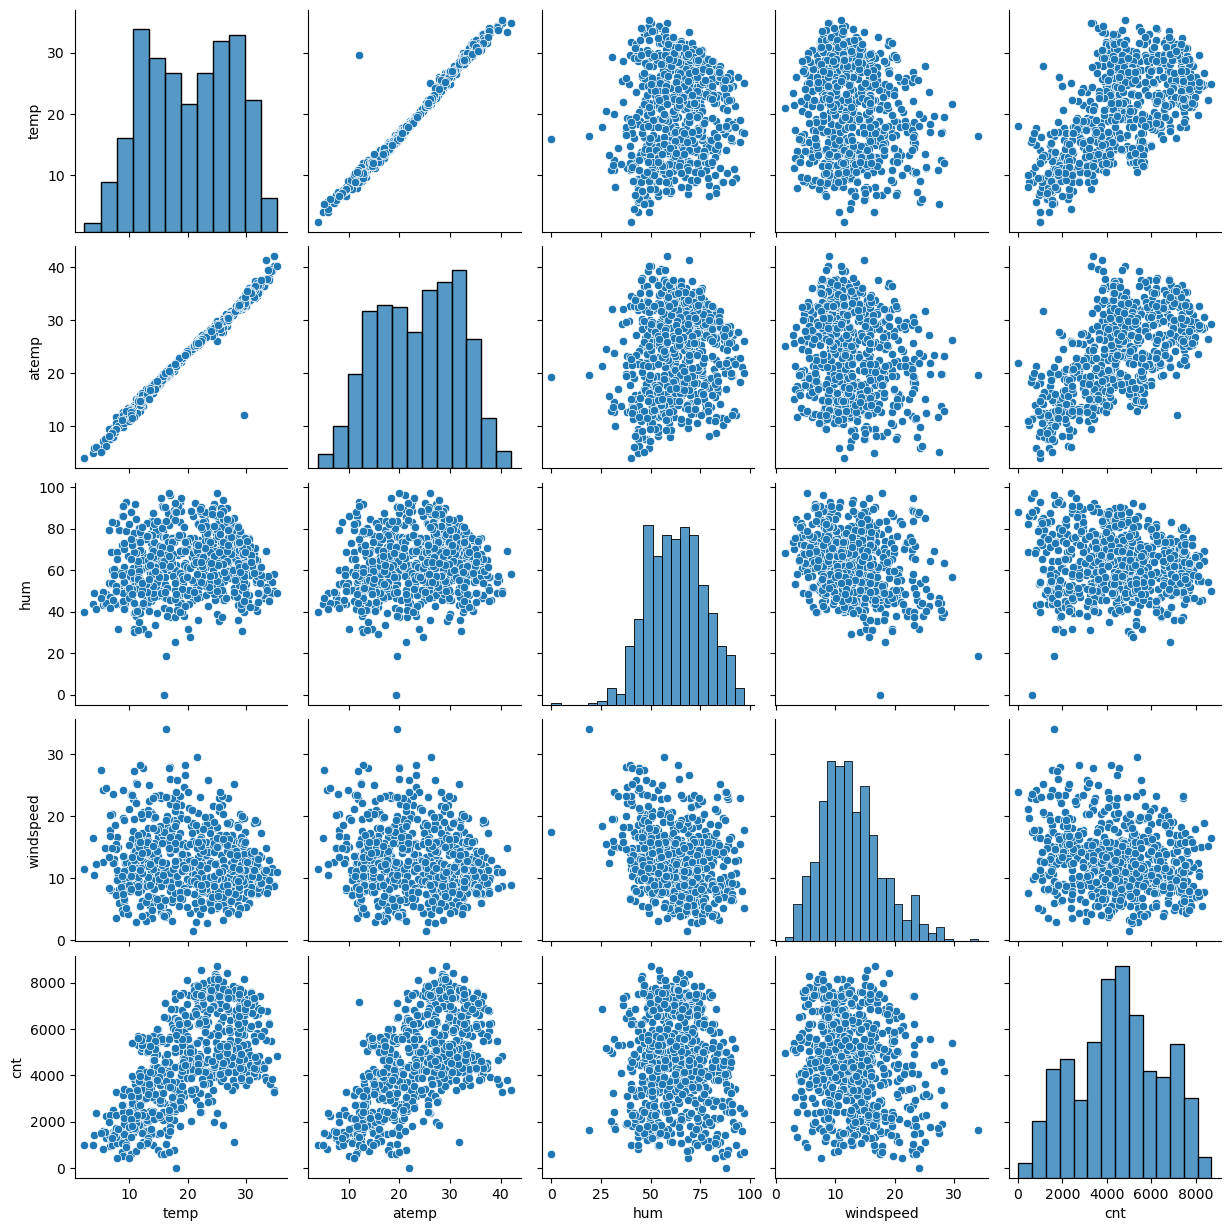

In [400]:
#Visualizing
num_var=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(df[num_var])
plt.show()

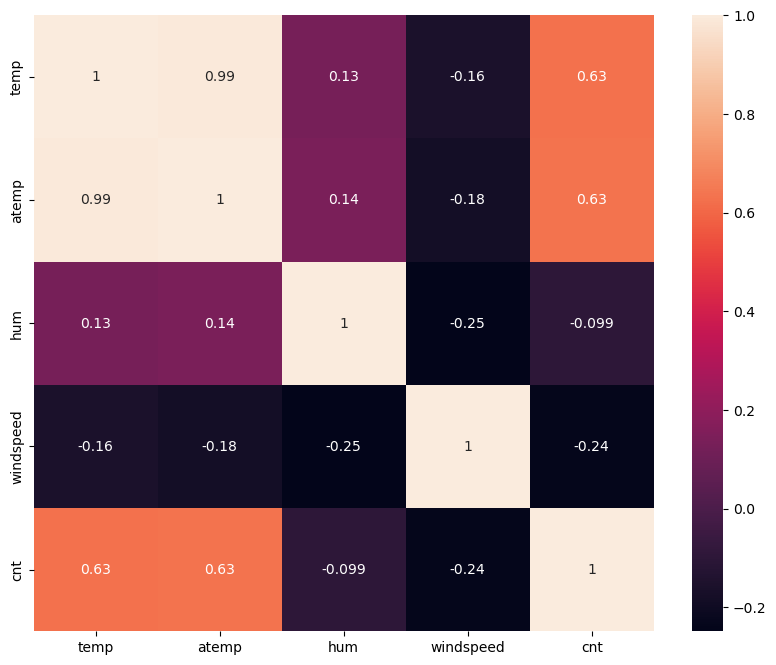

In [401]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_var].corr(), annot=True)
plt.show()

### create dummy vars

In [402]:
season_dummy= pd.get_dummies(df['season'])
season_dummy.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [403]:
season_dummy= pd.get_dummies(df['season'], drop_first=True)
season_dummy.drop(['spring'], axis=1, inplace=True)
season_dummy.head()

,summer,winter
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


Summer-Winter
00- Spring
01- Winter
10= Summer
11= fall

In [404]:
weathersit_dummy= pd.get_dummies(df['weathersit'], drop_first=True)
weathersit_dummy.head()

,Light Rain,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


LightRain- Mist
00- clear
10- lightRain
01-Mist
11- HeavyRain (althrough, this is not present)

In [405]:
mnth_dummy= pd.get_dummies(df['mnth'], prefix='month_', drop_first=True)
mnth_dummy.head()

,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [406]:
weekday_dummy= pd.get_dummies(df['weekday'], prefix='weekday_', drop_first=True)
weekday_dummy.head()

,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [407]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [408]:
df= pd.concat([df, season_dummy, weathersit_dummy, mnth_dummy, weekday_dummy ], axis=1)
df.drop(['season', 'weathersit', 'mnth', 'weekday'], axis=1, inplace=True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,winter,...,month__9,month__10,month__11,month__12,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,1,0


### Split into train and test

In [409]:
from  sklearn.model_selection import train_test_split

In [410]:
df_train, df_test= train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [411]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,winter,...,month__9,month__10,month__11,month__12,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,1,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,0,0,1,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,0,0,0


In [412]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Rescaling the variables
- Minmax()
- Standarization

In [413]:
# Instantiate the object
from sklearn.preprocessing import MinMaxScaler


In [414]:
scaler= MinMaxScaler()

In [415]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'summer', 'winter', 'Light Rain', 'Mist', 'month__2', 'month__3',
       'month__4', 'month__5', 'month__6', 'month__7', 'month__8', 'month__9',
       'month__10', 'month__11', 'month__12', 'weekday__1', 'weekday__2',
       'weekday__3', 'weekday__4', 'weekday__5', 'weekday__6'],
      dtype='object')

In [416]:

num_var=[   'temp', 'atemp', 'hum', 'windspeed' , 'cnt']

In [417]:
df_train[num_var]= scaler.fit_transform(df_train[num_var])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,winter,...,month__9,month__10,month__11,month__12,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,1,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,1,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,0,0


In [418]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    float64
 8   summer      510 non-null    uint8  
 9   winter      510 non-null    uint8  
 10  Light Rain  510 non-null    uint8  
 11  Mist        510 non-null    uint8  
 12  month__2    510 non-null    uint8  
 13  month__3    510 non-null    uint8  
 14  month__4    510 non-null    uint8  
 15  month__5    510 non-null    uint8  
 16  month__6    510 non-null    uint8  
 17  month__7    510 non-null    uint8  
 18  month__8    510 non-null    uint8  
 19  month__9    510 non-null    

In [419]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,winter,...,month__9,month__10,month__11,month__12,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.24902,...,0.080392,0.086275,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.43287,...,0.272166,0.281045,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


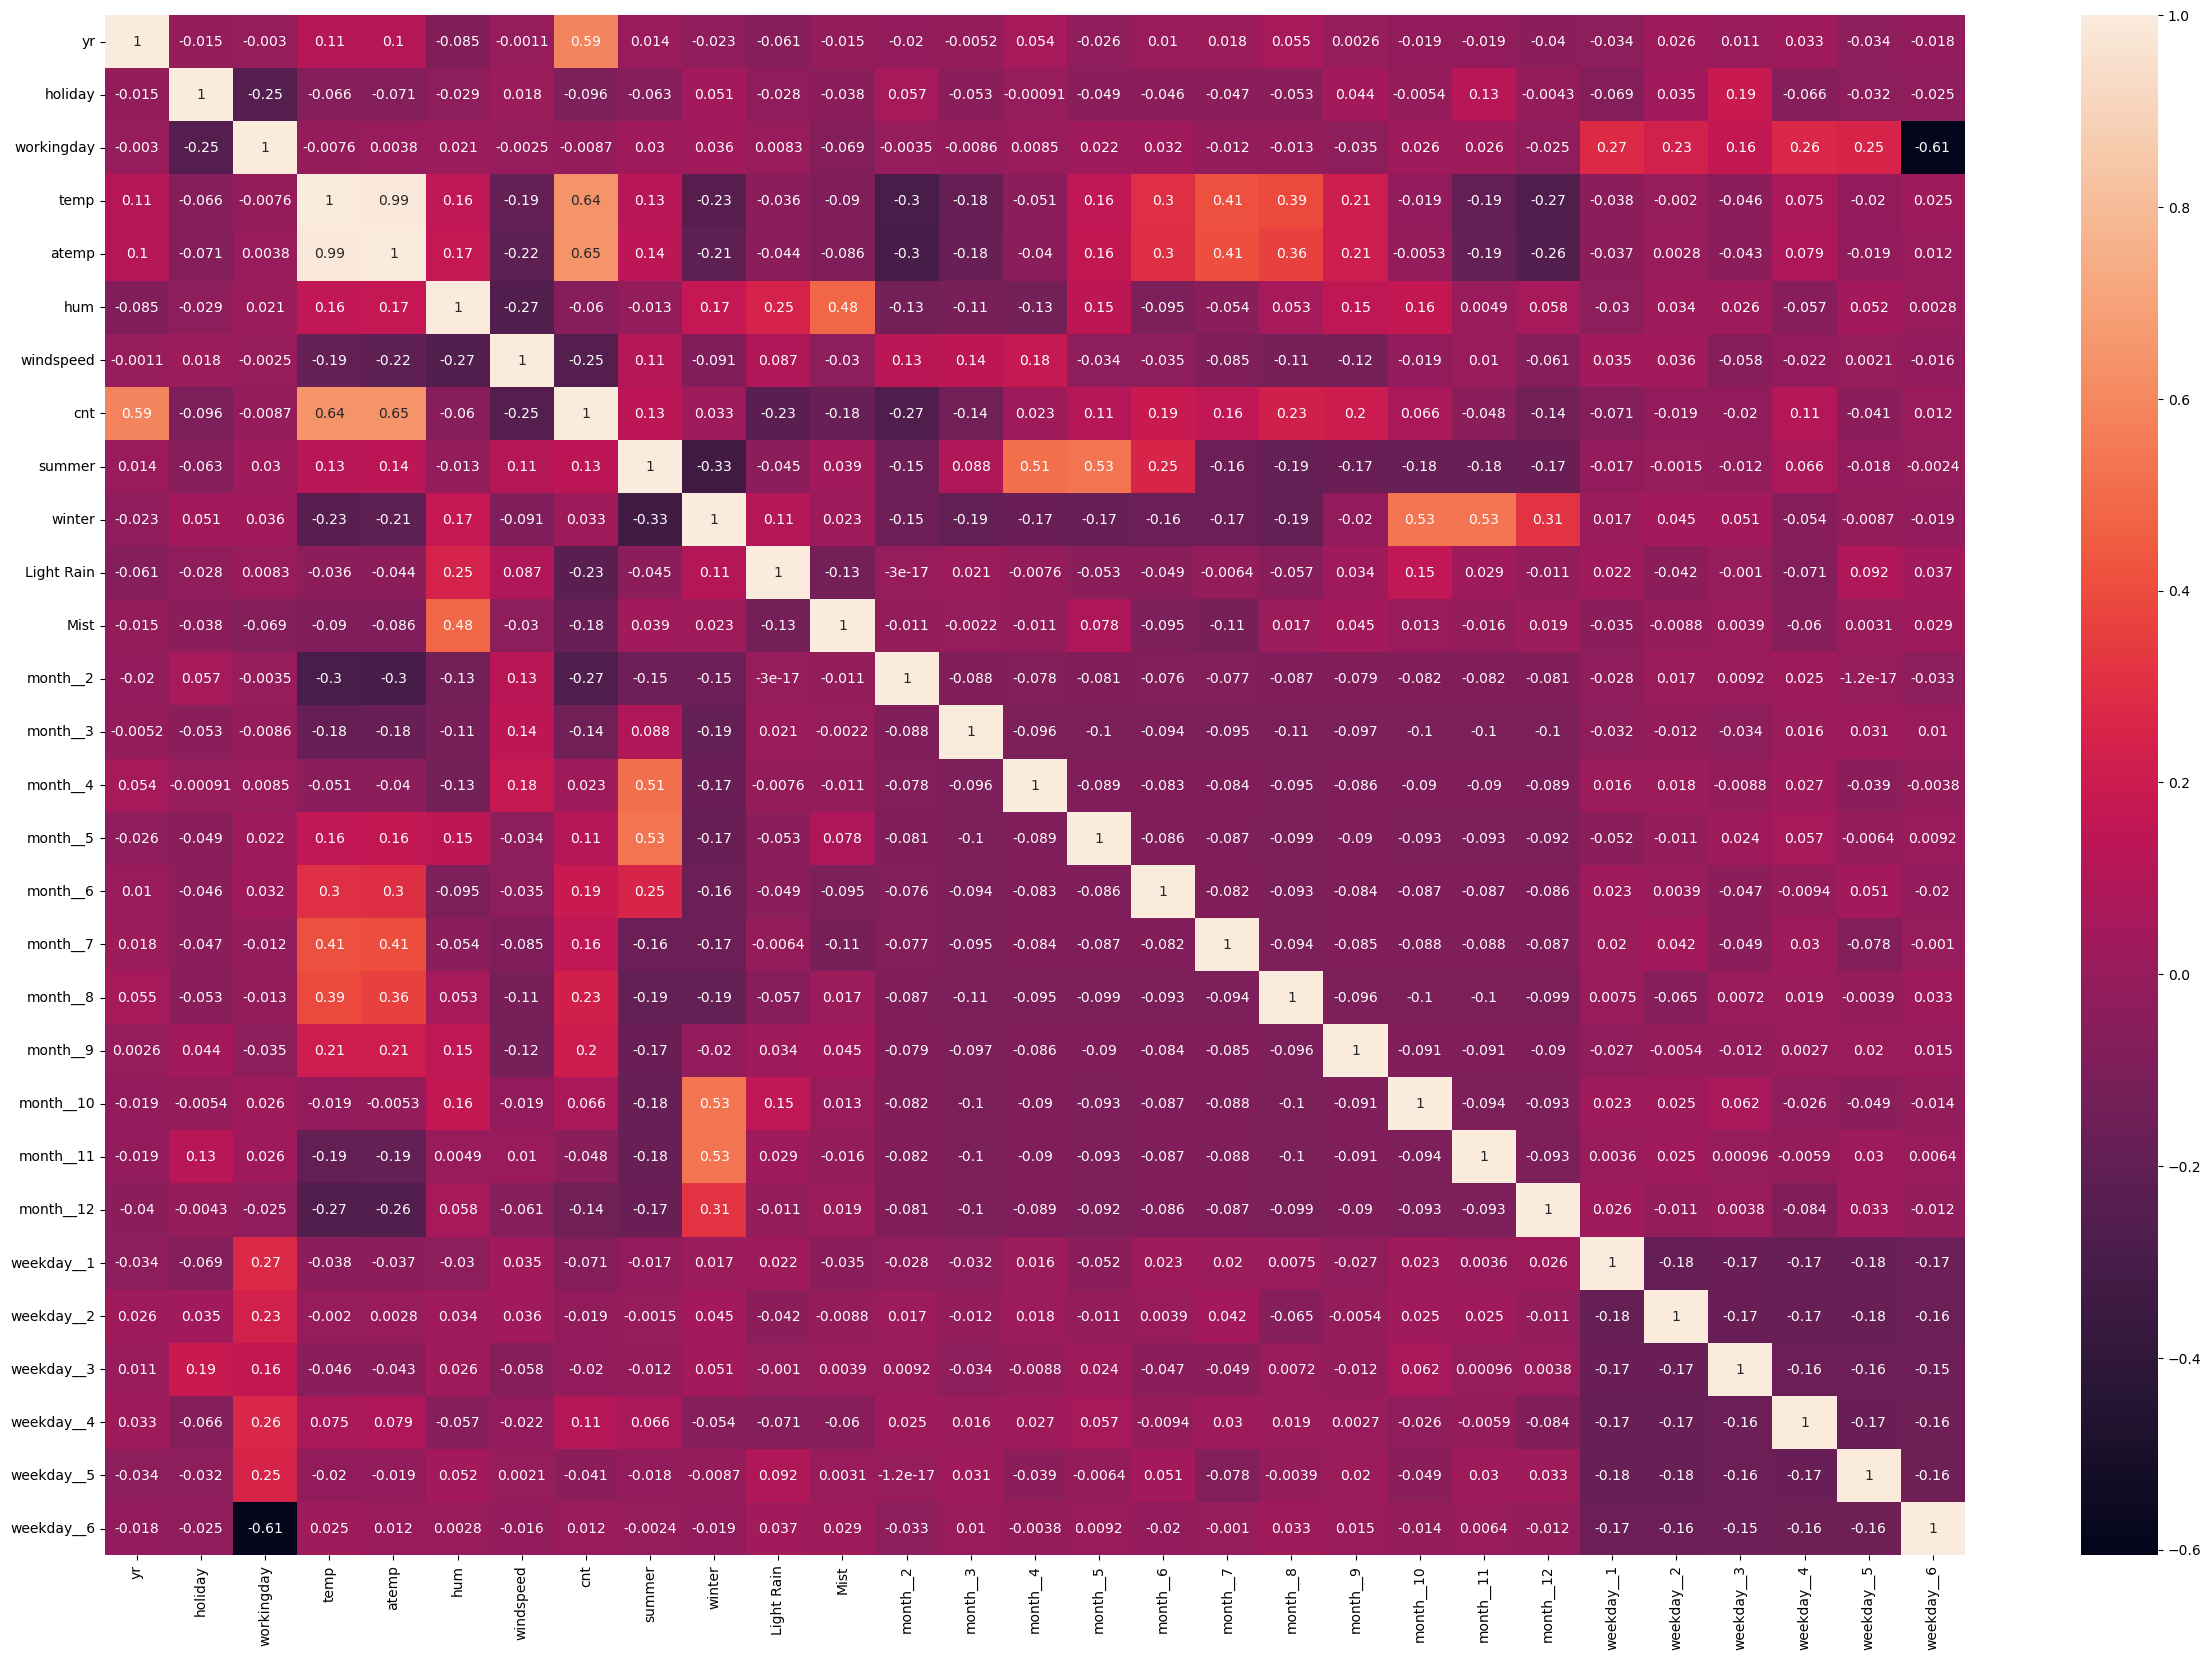

In [420]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

### cnt and temp


In [421]:
y_train= df_train.pop('cnt')
X_train= df_train

In [422]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [423]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,winter,Light Rain,...,month__9,month__10,month__11,month__12,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,1,0,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,0,0,1,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [424]:
import statsmodels.api as sm

In [425]:
X_train_sm= sm.add_constant(X_train['temp'])


In [426]:
lr=sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()

In [427]:
lr_model.params

const    0.169798
temp     0.639952
dtype: float64

In [428]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           5.80e-61
Time:                        17:38:42   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [429]:
X_train_sm= sm.add_constant(X_train[['atemp', 'temp']]) 

In [430]:
lr= sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

In [431]:
lr_model.params

const    0.163383
atemp    0.492316
temp     0.181818
dtype: float64

In [432]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           1.95e-60
Time:                        17:38:42   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.000       0.124       0.202
atemp          0.4923      0.248      1.984      0.048       0.005       0.980
temp           0.1818      0.233      0.779      0.436      -0.277       0.640
==============================================================================
Omnibus:                        4.934   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.720
Skew:                           0.079   Prob(JB):                        0.156
Kurtosis:                       2.612   Cond. No.                         56.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

temp is not significat and R2 squared also does not increase so we will remove this variable

### Build Model-2

In [433]:
X_train_sm= sm.add_constant(X_train)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.56
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          1.17e-178
Time:                        17:38:42   Log-Likelihood:                 522.75
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     481   BIC:                            -864.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2377      0.030      7.861      0.000       0.178       0.297
yr             0.2306      0.008     28.299      0.000       0.215       0.247
holiday       -0.1348      0.065     -2.058      0.040      -0.263      -0.006
workingday    -0.0596      0.071     -0.837      0.403      -0.199       0.080
temp           0.4162      0.143      2.906      0.004       0.135       0.698
atemp          0.0385      0.139      0.277      0.782      -0.235       0.312
hum           -0.1598      0.039     -4.103      0.000      -0.236      -0.083
windspeed     -0.1844      0.027     -6.934      0.000      -0.237      -0.132
summer         0.0670      0.020      3.344      0.001       0.028       0.106
winter         0.1351      0.023      5.975      0.000       0.091       0.180
Light Rain    -0.2484      0.027     -9.316      0.000      -0.301      -0.196
Mist          -0.0588      0.011     -5.576      0.000      -0.080      -0.038
month__2       0.0257      0.021      1.236      0.217      -0.015       0.067
month__3       0.0694      0.022      3.110      0.002       0.026       0.113
month__4       0.0802      0.032      2.514      0.012       0.018       0.143
month__5       0.1033      0.035      2.948      0.003       0.034       0.172
month__6       0.0889      0.036      2.454      0.014       0.018       0.160
month__7       0.0680      0.036      1.892      0.059      -0.003       0.139
month__8       0.1253      0.033      3.790      0.000       0.060       0.190
month__9       0.1846      0.030      6.235      0.000       0.126       0.243
month__10      0.0862      0.033      2.626      0.009       0.022       0.151
month__11      0.0399      0.031      1.293      0.196      -0.021       0.101
month__12      0.0304      0.025      1.197      0.232      -0.019       0.080
weekday__1     0.0233      0.072      0.325      0.745      -0.117       0.164
weekday__2     0.0223      0.071      0.313      0.755      -0.118       0.162
weekday__3     0.0378      0.071      0.534      0.594      -0.101       0.177
weekday__4     0.0531      0.072      0.740      0.460      -0.088       0.194
weekday__5     0.0489      0.072      0.682      0.495      -0.092       0.190
weekday__6    -0.0069      0.015     -0.445      0.657      -0.037       0.023
==============================================================================
Omnibus:                       77.149   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.092
Skew:                          -0.757   Prob(JB):                     2.15e-44
Kurtosis:                       5.678   Cond. No.                         92.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

### calculate VIF

In [434]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

In [435]:
vif= pd.DataFrame()
vif['Features']= X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif


,Features,VIF
3,temp,444.55
4,atemp,381.50
2,workingday,229.47
22,weekday__1,50.76
23,weekday__2,49.61
26,weekday__5,48.16
25,weekday__4,47.10
24,weekday__3,43.27
5,hum,22.72
8,winter,8.12


###  atemp is high p value so will try to remove and check again all the coefficient and vif

In [436]:
X= X_train.drop(['atemp'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          1.19e-179
Time:                        17:38:43   Log-Likelihood:                 522.71
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     482   BIC:                            -870.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2380      0.030      7.883      0.000       0.179       0.297
yr             0.2306      0.008     28.329      0.000       0.215       0.247
holiday       -0.1349      0.065     -2.063      0.040      -0.263      -0.006
workingday    -0.0593      0.071     -0.834      0.405      -0.199       0.080
temp           0.4536      0.047      9.749      0.000       0.362       0.545
hum           -0.1594      0.039     -4.100      0.000      -0.236      -0.083
windspeed     -0.1860      0.026     -7.163      0.000      -0.237      -0.135
summer         0.0672      0.020      3.360      0.001       0.028       0.107
winter         0.1353      0.023      5.990      0.000       0.091       0.180
Light Rain    -0.2489      0.027     -9.369      0.000      -0.301      -0.197
Mist          -0.0589      0.011     -5.585      0.000      -0.080      -0.038
month__2       0.0258      0.021      1.240      0.216      -0.015       0.067
month__3       0.0693      0.022      3.110      0.002       0.026       0.113
month__4       0.0802      0.032      2.517      0.012       0.018       0.143
month__5       0.1028      0.035      2.939      0.003       0.034       0.171
month__6       0.0879      0.036      2.441      0.015       0.017       0.159
month__7       0.0670      0.036      1.876      0.061      -0.003       0.137
month__8       0.1239      0.033      3.797      0.000       0.060       0.188
month__9       0.1839      0.029      6.239      0.000       0.126       0.242
month__10      0.0861      0.033      2.626      0.009       0.022       0.151
month__11      0.0399      0.031      1.294      0.196      -0.021       0.101
month__12      0.0304      0.025      1.200      0.231      -0.019       0.080
weekday__1     0.0231      0.072      0.322      0.747      -0.118       0.164
weekday__2     0.0220      0.071      0.309      0.757      -0.118       0.162
weekday__3     0.0375      0.071      0.530      0.596      -0.101       0.176
weekday__4     0.0529      0.072      0.737      0.462      -0.088       0.194
weekday__5     0.0486      0.072      0.679      0.497      -0.092       0.189
weekday__6    -0.0072      0.015     -0.465      0.642      -0.037       0.023
==============================================================================
Omnibus:                       76.699   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.534
Skew:                          -0.753   Prob(JB):                     4.70e-44
Kurtosis:                       5.668   Cond. No.                         81.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [437]:
vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif


,Features,VIF
2,workingday,229.41
21,weekday__1,50.76
22,weekday__2,49.60
25,weekday__5,48.15
24,weekday__4,47.09
3,temp,46.33
23,weekday__3,43.26
4,hum,22.57
7,winter,8.12
1,holiday,6.95


### lets remove weekday_2

In [438]:
X= X.drop(['weekday__2'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.5
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          1.21e-180
Time:                        17:38:43   Log-Likelihood:                 522.65
No. Observations:                 510   AIC:                            -991.3
Df Residuals:                     483   BIC:                            -877.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2379      0.030      7.887      0.000       0.179       0.297
yr             0.2307      0.008     28.428      0.000       0.215       0.247
holiday       -0.1168      0.029     -4.069      0.000      -0.173      -0.060
workingday    -0.0378      0.015     -2.549      0.011      -0.067      -0.009
temp           0.4541      0.046      9.774      0.000       0.363       0.545
hum           -0.1588      0.039     -4.094      0.000      -0.235      -0.083
windspeed     -0.1862      0.026     -7.178      0.000      -0.237      -0.135
summer         0.0672      0.020      3.363      0.001       0.028       0.107
winter         0.1350      0.023      5.988      0.000       0.091       0.179
Light Rain    -0.2490      0.027     -9.379      0.000      -0.301      -0.197
Mist          -0.0589      0.011     -5.591      0.000      -0.080      -0.038
month__2       0.0258      0.021      1.244      0.214      -0.015       0.067
month__3       0.0691      0.022      3.105      0.002       0.025       0.113
month__4       0.0801      0.032      2.516      0.012       0.018       0.143
month__5       0.1024      0.035      2.933      0.004       0.034       0.171
month__6       0.0875      0.036      2.434      0.015       0.017       0.158
month__7       0.0666      0.036      1.867      0.063      -0.003       0.137
month__8       0.1234      0.033      3.790      0.000       0.059       0.187
month__9       0.1837      0.029      6.240      0.000       0.126       0.242
month__10      0.0861      0.033      2.629      0.009       0.022       0.150
month__11      0.0393      0.031      1.278      0.202      -0.021       0.100
month__12      0.0305      0.025      1.202      0.230      -0.019       0.080
weekday__1     0.0014      0.014      0.095      0.924      -0.027       0.030
weekday__3     0.0161      0.015      1.085      0.278      -0.013       0.045
weekday__4     0.0311      0.015      2.120      0.035       0.002       0.060
weekday__5     0.0269      0.015      1.842      0.066      -0.002       0.056
weekday__6    -0.0076      0.015     -0.499      0.618      -0.038       0.022
==============================================================================
Omnibus:                       76.661   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.817
Skew:                          -0.756   Prob(JB):                     1.11e-43
Kurtosis:                       5.650   Cond. No.                         39.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [439]:
vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif


,Features,VIF
3,temp,46.29
4,hum,22.51
2,workingday,9.64
7,winter,8.10
13,month__5,6.56
16,month__8,6.51
6,summer,6.26
15,month__7,6.20
14,month__6,6.11
18,month__10,5.92


### lets remove weekday__1 now

In [440]:
X= X.drop(['weekday__1'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.9
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          1.14e-181
Time:                        17:38:43   Log-Likelihood:                 522.65
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     484   BIC:                            -883.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2381      0.030      7.922      0.000       0.179       0.297
yr             0.2307      0.008     28.466      0.000       0.215       0.247
holiday       -0.1163      0.028     -4.106      0.000      -0.172      -0.061
workingday    -0.0371      0.013     -2.865      0.004      -0.063      -0.012
temp           0.4539      0.046      9.788      0.000       0.363       0.545
hum           -0.1590      0.039     -4.107      0.000      -0.235      -0.083
windspeed     -0.1862      0.026     -7.189      0.000      -0.237      -0.135
summer         0.0672      0.020      3.367      0.001       0.028       0.106
winter         0.1349      0.022      5.998      0.000       0.091       0.179
Light Rain    -0.2488      0.026     -9.398      0.000      -0.301      -0.197
Mist          -0.0588      0.011     -5.596      0.000      -0.079      -0.038
month__2       0.0258      0.021      1.243      0.214      -0.015       0.067
month__3       0.0691      0.022      3.107      0.002       0.025       0.113
month__4       0.0801      0.032      2.518      0.012       0.018       0.143
month__5       0.1024      0.035      2.936      0.003       0.034       0.171
month__6       0.0876      0.036      2.439      0.015       0.017       0.158
month__7       0.0666      0.036      1.871      0.062      -0.003       0.137
month__8       0.1236      0.033      3.802      0.000       0.060       0.187
month__9       0.1838      0.029      6.251      0.000       0.126       0.242
month__10      0.0863      0.033      2.638      0.009       0.022       0.151
month__11      0.0394      0.031      1.283      0.200      -0.021       0.100
month__12      0.0306      0.025      1.209      0.227      -0.019       0.080
weekday__3     0.0154      0.013      1.179      0.239      -0.010       0.041
weekday__4     0.0304      0.013      2.376      0.018       0.005       0.056
weekday__5     0.0262      0.013      2.068      0.039       0.001       0.051
weekday__6    -0.0077      0.015     -0.501      0.617      -0.038       0.022
==============================================================================
Omnibus:                       76.602   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.065
Skew:                          -0.755   Prob(JB):                     9.79e-44
Kurtosis:                       5.654   Cond. No.                         39.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [441]:
vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif


,Features,VIF
3,temp,46.24
4,hum,22.51
7,winter,8.08
2,workingday,7.13
13,month__5,6.56
16,month__8,6.50
6,summer,6.26
15,month__7,6.20
14,month__6,6.11
18,month__10,5.91


### lets remove weekday__6

In [442]:
X= X.drop(['weekday__6'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.6
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          1.19e-182
Time:                        17:38:43   Log-Likelihood:                 522.52
No. Observations:                 510   AIC:                            -995.0
Df Residuals:                     485   BIC:                            -889.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2342      0.029      8.072      0.000       0.177       0.291
yr             0.2308      0.008     28.515      0.000       0.215       0.247
holiday       -0.1132      0.028     -4.101      0.000      -0.167      -0.059
workingday    -0.0334      0.011     -3.143      0.002      -0.054      -0.013
temp           0.4536      0.046      9.789      0.000       0.363       0.545
hum           -0.1590      0.039     -4.111      0.000      -0.235      -0.083
windspeed     -0.1859      0.026     -7.185      0.000      -0.237      -0.135
summer         0.0672      0.020      3.369      0.001       0.028       0.106
winter         0.1351      0.022      6.011      0.000       0.091       0.179
Light Rain    -0.2493      0.026     -9.433      0.000      -0.301      -0.197
Mist          -0.0587      0.011     -5.590      0.000      -0.079      -0.038
month__2       0.0260      0.021      1.258      0.209      -0.015       0.067
month__3       0.0693      0.022      3.116      0.002       0.026       0.113
month__4       0.0802      0.032      2.523      0.012       0.018       0.143
month__5       0.1025      0.035      2.940      0.003       0.034       0.171
month__6       0.0879      0.036      2.451      0.015       0.017       0.158
month__7       0.0671      0.036      1.886      0.060      -0.003       0.137
month__8       0.1237      0.032      3.808      0.000       0.060       0.187
month__9       0.1840      0.029      6.262      0.000       0.126       0.242
month__10      0.0863      0.033      2.640      0.009       0.022       0.150
month__11      0.0389      0.031      1.269      0.205      -0.021       0.099
month__12      0.0308      0.025      1.218      0.224      -0.019       0.080
weekday__3     0.0155      0.013      1.188      0.235      -0.010       0.041
weekday__4     0.0305      0.013      2.382      0.018       0.005       0.056
weekday__5     0.0263      0.013      2.076      0.038       0.001       0.051
==============================================================================
Omnibus:                       75.411   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.427
Skew:                          -0.744   Prob(JB):                     6.03e-43
Kurtosis:                       5.633   Cond. No.                         39.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [443]:
vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif


,Features,VIF
3,temp,46.13
4,hum,21.07
7,winter,8.08
13,month__5,6.56
16,month__8,6.50
6,summer,6.26
15,month__7,6.20
14,month__6,6.11
18,month__10,5.90
19,month__11,5.14


### lets remove weekday__3

In [444]:
X= X.drop(['weekday__3'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.5
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          2.17e-183
Time:                        17:38:43   Log-Likelihood:                 521.78
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     486   BIC:                            -893.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2357      0.029      8.126      0.000       0.179       0.293
yr             0.2310      0.008     28.525      0.000       0.215       0.247
holiday       -0.1042      0.027     -3.924      0.000      -0.156      -0.052
workingday    -0.0289      0.010     -2.909      0.004      -0.048      -0.009
temp           0.4544      0.046      9.803      0.000       0.363       0.545
hum           -0.1601      0.039     -4.139      0.000      -0.236      -0.084
windspeed     -0.1883      0.026     -7.299      0.000      -0.239      -0.138
summer         0.0674      0.020      3.376      0.001       0.028       0.107
winter         0.1354      0.022      6.025      0.000       0.091       0.180
Light Rain    -0.2485      0.026     -9.399      0.000      -0.300      -0.197
Mist          -0.0584      0.011     -5.561      0.000      -0.079      -0.038
month__2       0.0258      0.021      1.247      0.213      -0.015       0.067
month__3       0.0687      0.022      3.093      0.002       0.025       0.112
month__4       0.0793      0.032      2.496      0.013       0.017       0.142
month__5       0.1024      0.035      2.937      0.003       0.034       0.171
month__6       0.0863      0.036      2.407      0.016       0.016       0.157
month__7       0.0653      0.036      1.835      0.067      -0.005       0.135
month__8       0.1232      0.032      3.793      0.000       0.059       0.187
month__9       0.1830      0.029      6.228      0.000       0.125       0.241
month__10      0.0858      0.033      2.626      0.009       0.022       0.150
month__11      0.0375      0.031      1.222      0.222      -0.023       0.098
month__12      0.0300      0.025      1.188      0.235      -0.020       0.080
weekday__4     0.0260      0.012      2.124      0.034       0.002       0.050
weekday__5     0.0218      0.012      1.801      0.072      -0.002       0.046
==============================================================================
Omnibus:                       75.935   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.390
Skew:                          -0.759   Prob(JB):                     4.54e-42
Kurtosis:                       5.580   Cond. No.                         39.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [445]:
vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif


,Features,VIF
3,temp,46.12
4,hum,21.07
7,winter,8.08
13,month__5,6.56
16,month__8,6.50
6,summer,6.26
15,month__7,6.19
14,month__6,6.10
18,month__10,5.90
19,month__11,5.14


### month__12

In [446]:
X= X.drop(['month__12'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     124.7
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          3.87e-184
Time:                        17:38:43   Log-Likelihood:                 521.04
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     487   BIC:                            -898.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2413      0.029      8.430      0.000       0.185       0.298
yr             0.2303      0.008     28.501      0.000       0.214       0.246
holiday       -0.1041      0.027     -3.917      0.000      -0.156      -0.052
workingday    -0.0292      0.010     -2.940      0.003      -0.049      -0.010
temp           0.4659      0.045     10.273      0.000       0.377       0.555
hum           -0.1593      0.039     -4.116      0.000      -0.235      -0.083
windspeed     -0.1871      0.026     -7.253      0.000      -0.238      -0.136
summer         0.0679      0.020      3.399      0.001       0.029       0.107
winter         0.1519      0.018      8.605      0.000       0.117       0.187
Light Rain    -0.2482      0.026     -9.384      0.000      -0.300      -0.196
Mist          -0.0589      0.011     -5.604      0.000      -0.079      -0.038
month__2       0.0166      0.019      0.863      0.389      -0.021       0.054
month__3       0.0579      0.020      2.856      0.004       0.018       0.098
month__4       0.0673      0.030      2.232      0.026       0.008       0.126
month__5       0.0886      0.033      2.694      0.007       0.024       0.153
month__6       0.0712      0.034      2.123      0.034       0.005       0.137
month__7       0.0495      0.033      1.500      0.134      -0.015       0.114
month__8       0.1082      0.030      3.614      0.000       0.049       0.167
month__9       0.1655      0.025      6.505      0.000       0.116       0.215
month__10      0.0573      0.022      2.580      0.010       0.014       0.101
month__11      0.0105      0.021      0.508      0.612      -0.030       0.051
weekday__4     0.0257      0.012      2.100      0.036       0.002       0.050
weekday__5     0.0221      0.012      1.831      0.068      -0.002       0.046
==============================================================================
Omnibus:                       73.828   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.296
Skew:                          -0.744   Prob(JB):                     2.60e-40
Kurtosis:                       5.523   Cond. No.                         34.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [447]:

vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,temp,43.59
4,hum,20.27
6,summer,6.26
13,month__5,5.85
16,month__8,5.53
14,month__6,5.37
15,month__7,5.35
7,winter,4.88
12,month__4,4.53
2,workingday,4.37


### month__11

In [448]:
X= X.drop(['month__11'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     130.8
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          3.80e-185
Time:                        17:38:43   Log-Likelihood:                 520.90
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     488   BIC:                            -904.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2413      0.029      8.434      0.000       0.185       0.297
yr             0.2301      0.008     28.523      0.000       0.214       0.246
holiday       -0.1025      0.026     -3.887      0.000      -0.154      -0.051
workingday    -0.0290      0.010     -2.925      0.004      -0.048      -0.010
temp           0.4698      0.045     10.525      0.000       0.382       0.558
hum           -0.1607      0.039     -4.166      0.000      -0.236      -0.085
windspeed     -0.1862      0.026     -7.241      0.000      -0.237      -0.136
summer         0.0681      0.020      3.411      0.001       0.029       0.107
winter         0.1567      0.015     10.500      0.000       0.127       0.186
Light Rain    -0.2474      0.026     -9.377      0.000      -0.299      -0.196
Mist          -0.0587      0.010     -5.595      0.000      -0.079      -0.038
month__2       0.0157      0.019      0.820      0.413      -0.022       0.053
month__3       0.0565      0.020      2.816      0.005       0.017       0.096
month__4       0.0654      0.030      2.188      0.029       0.007       0.124
month__5       0.0864      0.033      2.652      0.008       0.022       0.150
month__6       0.0685      0.033      2.070      0.039       0.003       0.133
month__7       0.0467      0.033      1.436      0.152      -0.017       0.111
month__8       0.1057      0.029      3.583      0.000       0.048       0.164
month__9       0.1623      0.025      6.592      0.000       0.114       0.211
month__10      0.0510      0.018      2.776      0.006       0.015       0.087
weekday__4     0.0259      0.012      2.120      0.034       0.002       0.050
weekday__5     0.0222      0.012      1.836      0.067      -0.002       0.046
==============================================================================
Omnibus:                       72.646   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.845
Skew:                          -0.735   Prob(JB):                     2.41e-39
Kurtosis:                       5.492   Cond. No.                         34.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [449]:

vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,temp,42.27
4,hum,20.04
6,summer,6.26
13,month__5,5.75
16,month__8,5.37
14,month__6,5.24
15,month__7,5.20
12,month__4,4.46
2,workingday,4.36
5,windspeed,4.24


### month__2

In [450]:
X= X.drop(['month__2'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.5
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          4.46e-186
Time:                        17:38:44   Log-Likelihood:                 520.55
No. Observations:                 510   AIC:                            -999.1
Df Residuals:                     489   BIC:                            -910.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2465      0.028      8.848      0.000       0.192       0.301
yr             0.2301      0.008     28.527      0.000       0.214       0.246
holiday       -0.1026      0.026     -3.889      0.000      -0.154      -0.051
workingday    -0.0288      0.010     -2.913      0.004      -0.048      -0.009
temp           0.4731      0.044     10.645      0.000       0.386       0.560
hum           -0.1630      0.038     -4.238      0.000      -0.239      -0.087
windspeed     -0.1848      0.026     -7.205      0.000      -0.235      -0.134
summer         0.0682      0.020      3.423      0.001       0.029       0.107
winter         0.1517      0.014     11.161      0.000       0.125       0.178
Light Rain    -0.2464      0.026     -9.353      0.000      -0.298      -0.195
Mist          -0.0585      0.010     -5.579      0.000      -0.079      -0.038
month__3       0.0504      0.019      2.705      0.007       0.014       0.087
month__4       0.0588      0.029      2.044      0.041       0.002       0.115
month__5       0.0798      0.032      2.529      0.012       0.018       0.142
month__6       0.0614      0.032      1.923      0.055      -0.001       0.124
month__7       0.0395      0.031      1.261      0.208      -0.022       0.101
month__8       0.0988      0.028      3.495      0.001       0.043       0.154
month__9       0.1569      0.024      6.613      0.000       0.110       0.204
month__10      0.0500      0.018      2.730      0.007       0.014       0.086
weekday__4     0.0263      0.012      2.159      0.031       0.002       0.050
weekday__5     0.0220      0.012      1.822      0.069      -0.002       0.046
==============================================================================
Omnibus:                       72.982   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.221
Skew:                          -0.739   Prob(JB):                     1.99e-39
Kurtosis:                       5.490   Cond. No.                         32.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [451]:

vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,temp,41.53
4,hum,19.67
6,summer,6.26
12,month__5,5.38
15,month__8,4.90
13,month__6,4.88
14,month__7,4.79
2,workingday,4.35
11,month__4,4.17
5,windspeed,4.06


### month__7

In [452]:
X= X.drop(['month__7'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.4
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          8.05e-187
Time:                        17:38:44   Log-Likelihood:                 519.72
No. Observations:                 510   AIC:                            -999.4
Df Residuals:                     490   BIC:                            -914.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2443      0.028      8.780      0.000       0.190       0.299
yr             0.2290      0.008     28.543      0.000       0.213       0.245
holiday       -0.1062      0.026     -4.048      0.000      -0.158      -0.055
workingday    -0.0282      0.010     -2.846      0.005      -0.048      -0.009
temp           0.5199      0.025     21.161      0.000       0.472       0.568
hum           -0.1722      0.038     -4.559      0.000      -0.246      -0.098
windspeed     -0.1881      0.026     -7.368      0.000      -0.238      -0.138
summer         0.0702      0.020      3.529      0.000       0.031       0.109
winter         0.1445      0.012     11.696      0.000       0.120       0.169
Light Rain    -0.2433      0.026     -9.270      0.000      -0.295      -0.192
Mist          -0.0572      0.010     -5.480      0.000      -0.078      -0.037
month__3       0.0394      0.016      2.392      0.017       0.007       0.072
month__4       0.0428      0.026      1.656      0.098      -0.008       0.093
month__5       0.0571      0.026      2.202      0.028       0.006       0.108
month__6       0.0329      0.023      1.457      0.146      -0.011       0.077
month__8       0.0706      0.017      4.081      0.000       0.037       0.105
month__9       0.1358      0.017      8.074      0.000       0.103       0.169
month__10      0.0422      0.017      2.447      0.015       0.008       0.076
weekday__4     0.0254      0.012      2.084      0.038       0.001       0.049
weekday__5     0.0205      0.012      1.706      0.089      -0.003       0.044
==============================================================================
Omnibus:                       66.774   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.748
Skew:                          -0.699   Prob(JB):                     4.11e-34
Kurtosis:                       5.298   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [453]:


vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,hum,17.28
3,temp,12.32
6,summer,6.22
2,workingday,4.34
5,windspeed,3.95
12,month__5,3.64
11,month__4,3.34
13,month__6,2.43
7,winter,2.41
9,Mist,2.21


### month__6

In [454]:
X= X.drop(['month__6'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.0
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          1.84e-187
Time:                        17:38:44   Log-Likelihood:                 518.62
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     491   BIC:                            -918.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2455      0.028      8.817      0.000       0.191       0.300
yr             0.2286      0.008     28.482      0.000       0.213       0.244
holiday       -0.1074      0.026     -4.094      0.000      -0.159      -0.056
workingday    -0.0278      0.010     -2.809      0.005      -0.047      -0.008
temp           0.5338      0.023     23.554      0.000       0.489       0.578
hum           -0.1780      0.038     -4.733      0.000      -0.252      -0.104
windspeed     -0.1886      0.026     -7.377      0.000      -0.239      -0.138
summer         0.0870      0.016      5.370      0.000       0.055       0.119
winter         0.1421      0.012     11.592      0.000       0.118       0.166
Light Rain    -0.2435      0.026     -9.268      0.000      -0.295      -0.192
Mist          -0.0569      0.010     -5.447      0.000      -0.077      -0.036
month__3       0.0298      0.015      1.970      0.049    8.49e-05       0.060
month__4       0.0212      0.021      1.001      0.317      -0.020       0.063
month__5       0.0340      0.021      1.654      0.099      -0.006       0.074
month__8       0.0620      0.016      3.808      0.000       0.030       0.094
month__9       0.1295      0.016      7.957      0.000       0.098       0.162
month__10      0.0403      0.017      2.337      0.020       0.006       0.074
weekday__4     0.0246      0.012      2.019      0.044       0.001       0.049
weekday__5     0.0216      0.012      1.799      0.073      -0.002       0.045
==============================================================================
Omnibus:                       68.071   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.426
Skew:                          -0.719   Prob(JB):                     4.83e-34
Kurtosis:                       5.270   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [455]:

vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,hum,17.00
3,temp,10.25
2,workingday,4.33
6,summer,4.12
5,windspeed,3.95
7,winter,2.37
12,month__5,2.27
11,month__4,2.25
9,Mist,2.21
0,yr,2.04


### month__4

In [456]:
X= X.drop(['month__4'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.9
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          2.36e-188
Time:                        17:38:44   Log-Likelihood:                 518.10
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     492   BIC:                            -924.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2475      0.028      8.913      0.000       0.193       0.302
yr             0.2291      0.008     28.572      0.000       0.213       0.245
holiday       -0.1073      0.026     -4.088      0.000      -0.159      -0.056
workingday    -0.0278      0.010     -2.810      0.005      -0.047      -0.008
temp           0.5304      0.022     23.668      0.000       0.486       0.574
hum           -0.1792      0.038     -4.767      0.000      -0.253      -0.105
windspeed     -0.1859      0.025     -7.312      0.000      -0.236      -0.136
summer         0.0978      0.012      8.058      0.000       0.074       0.122
winter         0.1413      0.012     11.550      0.000       0.117       0.165
Light Rain    -0.2431      0.026     -9.252      0.000      -0.295      -0.191
Mist          -0.0569      0.010     -5.442      0.000      -0.077      -0.036
month__3       0.0247      0.014      1.735      0.083      -0.003       0.053
month__5       0.0232      0.018      1.327      0.185      -0.011       0.058
month__8       0.0625      0.016      3.843      0.000       0.031       0.094
month__9       0.1300      0.016      7.989      0.000       0.098       0.162
month__10      0.0407      0.017      2.361      0.019       0.007       0.074
weekday__4     0.0248      0.012      2.033      0.043       0.001       0.049
weekday__5     0.0213      0.012      1.774      0.077      -0.002       0.045
==============================================================================
Omnibus:                       68.774   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.570
Skew:                          -0.722   Prob(JB):                     1.00e-34
Kurtosis:                       5.298   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [457]:

vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,hum,16.98
3,temp,10.06
2,workingday,4.33
5,windspeed,3.84
7,winter,2.36
6,summer,2.31
9,Mist,2.21
0,yr,2.03
11,month__5,1.64
12,month__8,1.62


### month__5

In [458]:
X= X.drop(['month__5'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          4.25e-189
Time:                        17:38:44   Log-Likelihood:                 517.19
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2433      0.028      8.813      0.000       0.189       0.298
yr             0.2287      0.008     28.522      0.000       0.213       0.244
holiday       -0.1081      0.026     -4.115      0.000      -0.160      -0.056
workingday    -0.0280      0.010     -2.830      0.005      -0.048      -0.009
temp           0.5324      0.022     23.791      0.000       0.488       0.576
hum           -0.1717      0.037     -4.616      0.000      -0.245      -0.099
windspeed     -0.1869      0.025     -7.352      0.000      -0.237      -0.137
summer         0.1051      0.011      9.722      0.000       0.084       0.126
winter         0.1405      0.012     11.493      0.000       0.116       0.165
Light Rain    -0.2454      0.026     -9.354      0.000      -0.297      -0.194
Mist          -0.0571      0.010     -5.464      0.000      -0.078      -0.037
month__3       0.0218      0.014      1.545      0.123      -0.006       0.049
month__8       0.0607      0.016      3.740      0.000       0.029       0.093
month__9       0.1283      0.016      7.902      0.000       0.096       0.160
month__10      0.0400      0.017      2.324      0.021       0.006       0.074
weekday__4     0.0253      0.012      2.077      0.038       0.001       0.049
weekday__5     0.0215      0.012      1.790      0.074      -0.002       0.045
==============================================================================
Omnibus:                       68.224   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.889
Skew:                          -0.729   Prob(JB):                     2.83e-33
Kurtosis:                       5.220   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [459]:


vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,hum,16.81
3,temp,10.05
2,workingday,4.33
5,windspeed,3.79
7,winter,2.35
9,Mist,2.21
0,yr,2.02
6,summer,1.83
11,month__8,1.61
13,month__10,1.61


### month__3

In [460]:
X= X.drop(['month__3'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.2
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          1.01e-189
Time:                        17:38:44   Log-Likelihood:                 515.96
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     494   BIC:                            -932.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2495      0.027      9.120      0.000       0.196       0.303
yr             0.2289      0.008     28.506      0.000       0.213       0.245
holiday       -0.1106      0.026     -4.213      0.000      -0.162      -0.059
workingday    -0.0286      0.010     -2.881      0.004      -0.048      -0.009
temp           0.5272      0.022     23.797      0.000       0.484       0.571
hum           -0.1728      0.037     -4.640      0.000      -0.246      -0.100
windspeed     -0.1846      0.025     -7.262      0.000      -0.234      -0.135
summer         0.1051      0.011      9.704      0.000       0.084       0.126
winter         0.1368      0.012     11.395      0.000       0.113       0.160
Light Rain    -0.2440      0.026     -9.292      0.000      -0.296      -0.192
Mist          -0.0570      0.010     -5.448      0.000      -0.078      -0.036
month__8       0.0588      0.016      3.632      0.000       0.027       0.091
month__9       0.1268      0.016      7.814      0.000       0.095       0.159
month__10      0.0404      0.017      2.341      0.020       0.006       0.074
weekday__4     0.0259      0.012      2.125      0.034       0.002       0.050
weekday__5     0.0222      0.012      1.846      0.065      -0.001       0.046
==============================================================================
Omnibus:                       67.425   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.081
Skew:                          -0.705   Prob(JB):                     2.11e-34
Kurtosis:                       5.304   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [461]:

vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,hum,16.48
3,temp,9.92
2,workingday,4.33
5,windspeed,3.68
7,winter,2.27
9,Mist,2.21
0,yr,2.02
6,summer,1.83
12,month__10,1.61
10,month__8,1.60


### weekday__5

In [462]:
X= X.drop(['weekday__5'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          3.89e-190
Time:                        17:38:44   Log-Likelihood:                 514.20
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     495   BIC:                            -934.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2493      0.027      9.091      0.000       0.195       0.303
yr             0.2286      0.008     28.404      0.000       0.213       0.244
holiday       -0.1087      0.026     -4.135      0.000      -0.160      -0.057
workingday    -0.0229      0.009     -2.420      0.016      -0.041      -0.004
temp           0.5273      0.022     23.747      0.000       0.484       0.571
hum           -0.1721      0.037     -4.612      0.000      -0.245      -0.099
windspeed     -0.1848      0.025     -7.254      0.000      -0.235      -0.135
summer         0.1047      0.011      9.644      0.000       0.083       0.126
winter         0.1365      0.012     11.343      0.000       0.113       0.160
Light Rain    -0.2401      0.026     -9.152      0.000      -0.292      -0.189
Mist          -0.0567      0.010     -5.405      0.000      -0.077      -0.036
month__8       0.0587      0.016      3.617      0.000       0.027       0.091
month__9       0.1272      0.016      7.817      0.000       0.095       0.159
month__10      0.0383      0.017      2.222      0.027       0.004       0.072
weekday__4     0.0204      0.012      1.720      0.086      -0.003       0.044
==============================================================================
Omnibus:                       67.310   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.631
Skew:                          -0.711   Prob(JB):                     1.19e-33
Kurtosis:                       5.261   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### weekday__4

In [463]:
X= X.drop(['weekday__4'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.8
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          1.15e-190
Time:                        17:38:45   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     496   BIC:                            -938.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2502      0.027      9.106      0.000       0.196       0.304
yr             0.2288      0.008     28.385      0.000       0.213       0.245
holiday       -0.1085      0.026     -4.118      0.000      -0.160      -0.057
workingday    -0.0187      0.009     -2.046      0.041      -0.037      -0.001
temp           0.5292      0.022     23.814      0.000       0.486       0.573
hum           -0.1747      0.037     -4.676      0.000      -0.248      -0.101
windspeed     -0.1858      0.026     -7.283      0.000      -0.236      -0.136
summer         0.1055      0.011      9.708      0.000       0.084       0.127
winter         0.1361      0.012     11.290      0.000       0.112       0.160
Light Rain    -0.2424      0.026     -9.233      0.000      -0.294      -0.191
Mist          -0.0570      0.011     -5.424      0.000      -0.078      -0.036
month__8       0.0588      0.016      3.614      0.000       0.027       0.091
month__9       0.1276      0.016      7.828      0.000       0.096       0.160
month__10      0.0385      0.017      2.230      0.026       0.005       0.073
==============================================================================
Omnibus:                       69.297   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.467
Skew:                          -0.730   Prob(JB):                     1.06e-34
Kurtosis:                       5.287   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [464]:


vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,hum,16.46
3,temp,9.88
5,windspeed,3.68
2,workingday,3.63
7,winter,2.27
9,Mist,2.20
0,yr,2.02
6,summer,1.83
12,month__10,1.61
10,month__8,1.60


### hum

In [465]:
X= X.drop(['hum'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.3
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          3.26e-187
Time:                        17:38:45   Log-Likelihood:                 501.68
No. Observations:                 510   AIC:                            -977.4
Df Residuals:                     497   BIC:                            -922.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1523      0.018      8.385      0.000       0.117       0.188
yr             0.2327      0.008     28.422      0.000       0.217       0.249
holiday       -0.1123      0.027     -4.177      0.000      -0.165      -0.059
workingday    -0.0219      0.009     -2.347      0.019      -0.040      -0.004
temp           0.5081      0.022     22.876      0.000       0.464       0.552
windspeed     -0.1521      0.025     -6.087      0.000      -0.201      -0.103
summer         0.1024      0.011      9.252      0.000       0.081       0.124
winter         0.1280      0.012     10.508      0.000       0.104       0.152
Light Rain    -0.2892      0.025    -11.675      0.000      -0.338      -0.241
Mist          -0.0852      0.009     -9.673      0.000      -0.102      -0.068
month__8       0.0572      0.017      3.448      0.001       0.025       0.090
month__9       0.1209      0.017      7.296      0.000       0.088       0.153
month__10      0.0343      0.018      1.945      0.052      -0.000       0.069
==============================================================================
Omnibus:                       67.568   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.879
Skew:                          -0.721   Prob(JB):                     4.69e-33
Kurtosis:                       5.219   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [466]:

vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,temp,5.79
4,windspeed,3.39
2,workingday,3.17
6,winter,2.02
0,yr,2.01
5,summer,1.82
11,month__10,1.60
9,month__8,1.59
8,Mist,1.49
10,month__9,1.34


### month__10

In [467]:
X= X.drop(['month__10'], axis=1)
X_train_sm= sm.add_constant(X)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.0
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          1.37e-187
Time:                        17:38:45   Log-Likelihood:                 499.75
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     498   BIC:                            -924.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1479      0.018      8.186      0.000       0.112       0.183
yr             0.2324      0.008     28.313      0.000       0.216       0.248
holiday       -0.1134      0.027     -4.209      0.000      -0.166      -0.060
workingday    -0.0218      0.009     -2.336      0.020      -0.040      -0.003
temp           0.5164      0.022     23.619      0.000       0.473       0.559
windspeed     -0.1499      0.025     -5.989      0.000      -0.199      -0.101
summer         0.1009      0.011      9.110      0.000       0.079       0.123
winter         0.1397      0.011     13.171      0.000       0.119       0.161
Light Rain    -0.2837      0.025    -11.497      0.000      -0.332      -0.235
Mist          -0.0843      0.009     -9.562      0.000      -0.102      -0.067
month__8       0.0542      0.017      3.269      0.001       0.022       0.087
month__9       0.1159      0.016      7.060      0.000       0.084       0.148
==============================================================================
Omnibus:                       60.100   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.786
Skew:                          -0.670   Prob(JB):                     1.32e-27
Kurtosis:                       5.007   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [468]:

vif= pd.DataFrame()
vif['Features']= X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,temp,5.67
4,windspeed,3.39
2,workingday,3.17
0,yr,2.01
5,summer,1.81
9,month__8,1.58
6,winter,1.55
8,Mist,1.49
10,month__9,1.31
1,holiday,1.08


#### Now all are VIF are below 5 and all p value are below 0.05 so this model is the final one


## Step 4 Residual Anaylysis

In [469]:
y_train_pred= lr_model.predict(X_train_sm)
res = y_train-y_train_pred 

c:\Users\ziyae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


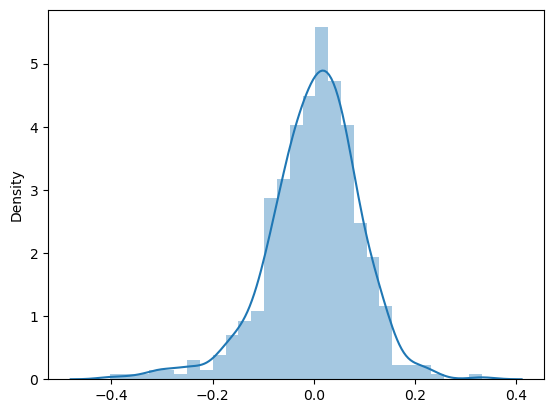

In [470]:
sns.distplot(res)
plt.show()   

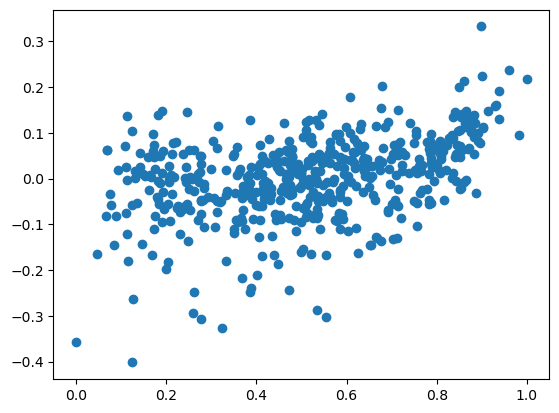

In [481]:
plt.scatter(y_train,res)
plt.show()

## Step 4 Prediction and Test 

In [471]:
num_var=[   'temp', 'atemp', 'hum', 'windspeed' , 'cnt']
df_test[num_var]= scaler.fit_transform(df_test[num_var])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,winter,...,month__9,month__10,month__11,month__12,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0,1,...,0,1,0,0,0,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,1,0,...,0,0,0,0,0,0,0,0,0,1


In [472]:
y_test= df_test.pop('cnt')
X_test= df_test


In [473]:
print(X_test.shape) 

(219, 28)


In [474]:
X_test.drop(['atemp','weekday__2', 'weekday__1','weekday__6',
'weekday__3','month__12','month__11', 'month__2',
'month__7','month__6', 'month__4', 'month__5'
, 'month__3', 'weekday__5', 'weekday__4', 'hum', 'month__10'
], axis=1, inplace=True)

In [475]:
print(X_test.shape) 

(219, 11)


In [476]:
X_test_sm= sm.add_constant(X_test)
y_test_pred= lr_model.predict(X_test_sm)

In [477]:
from sklearn.metrics import r2_score

In [478]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7887223944474875

c:\Users\ziyae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


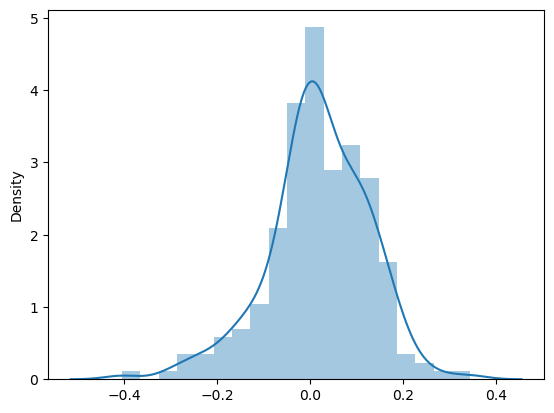

In [479]:
res_test= y_test- y_test_pred
sns.distplot(res_test)
plt.show()

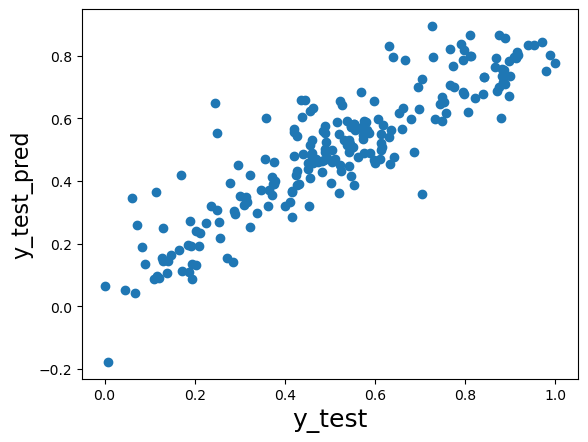

In [480]:
 
plt.scatter(y_test, y_test_pred) 
plt.xlabel('y_test', fontsize = 18)                    
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

In [482]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'summer', 'winter',
       'Light Rain', 'Mist', 'month__8', 'month__9'],
      dtype='object')

### best fitted equation is-
